# Predicting Obesity Levels Using the Random Forest Classifier Model

In [2]:
# Import Necessary Libraries 
# Data Exploration, Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting, Dealing with Labels/Categories and Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Saving Model as a File
import pickle

In [3]:
# Import Data and Check Shape (Please replace filepath to suit your needs)
filepath = 'C:/Users/New/ObesityData.csv'
obesity = pd.read_csv(filepath)
print(obesity.shape)

(2111, 17)


In [4]:
#Check Datatypes Present (using .info() or .dtypes)
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# Transform Column Names by Renaming and Making all Variables Uppercase for Consistency
obesity.rename(columns={'Gender' : 'Gender'.upper(), 'Age': 'Age'.upper(), 'Height':'Height'.upper(), 'Weight' : 'Weight'.upper(),'family_history_with_overweight': 'HISTORY', 'NObeyesdad': 'OBLEVEL'}, inplace=True)
obesity.columns

Index(['GENDER', 'AGE', 'HEIGHT', 'WEIGHT', 'HISTORY', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'OBLEVEL'],
      dtype='object')

In [6]:
# Feature Engineering Based on the Data Dictionary
# First Convert Float Datatypes into Int, Except Height and Weight that are actually Floats according to the Data Dictionary
ignore_floats = ['HEIGHT', 'WEIGHT']
for col in obesity.drop(columns=ignore_floats, axis=1).columns:
    if obesity[col].dtypes == 'float64':
         obesity[col] = obesity[col].astype(int)
            
# Convert the Integers for the Transformed Variables except AGE into Categories According to the Data Dictionary
# Create Dictionaries to Map the Variable Elements
cat_fvcv = {1:"Never", 2: "Sometimes", 3 :"Always"}
cat_ch2o = {1: "Less_than_1L", 2: "Between_1_and_2L", 3: "More_than_2L"}
cat_faf = {0: "I_do_not", 1: "One_or_Two_Days", 2: "Two_or_Four_Days", 3: "Four_or_Five_Days"}
cat_tue = {0: "Zero_to_Two_Hours", 1: "Between_Three_and_Five_Hours", 2: "More_than_Five_Hours" }

# Map Variable Elements Based on Dictionary Created
obesity["FCVC"] = obesity["FCVC"].map(cat_fvcv)
obesity["CH2O"] = obesity["CH2O"].map(cat_ch2o)
obesity["FAF"] = obesity["FAF"].map(cat_faf)
obesity["TUE"] = obesity["TUE"].map(cat_tue)

In [7]:
# View Description of Categorical Attributes and Target Variable
obesity.describe(exclude=[np.number])

GENDER HISTORY  FAVC       FCVC       CAEC SMOKE              CH2O  \
count    2111    2111  2111       2111       2111  2111              2111   
unique      2       2     2          3          4     2                 3   
top      Male     yes   yes  Sometimes  Sometimes    no  Between_1_and_2L   
freq     1068    1726  1866       1257       1765  2067              1180   

         SCC       FAF                TUE       CALC                 MTRANS  \
count   2111      2111               2111       2111                   2111   
unique     2         4                  3          4                      5   
top       no  I_do_not  Zero_to_Two_Hours  Sometimes  Public_Transportation   
freq    2015      1011               1415       1401                   1580   

               OBLEVEL  
count             2111  
unique               7  
top     Obesity_Type_I  
freq               351

In [8]:
# View Description of Numeric Attributes 
obesity.describe()

AGE       HEIGHT       WEIGHT          NCP
count  2111.000000  2111.000000  2111.000000  2111.000000
mean     23.972525     1.701677    86.586058     2.523449
std       6.308664     0.093305    26.191172     0.830288
min      14.000000     1.450000    39.000000     1.000000
25%      19.000000     1.630000    65.473343     2.000000
50%      22.000000     1.700499    83.000000     3.000000
75%      26.000000     1.768464   107.430682     3.000000
max      61.000000     1.980000   173.000000     4.000000

In [9]:
#Data Exploration and Vizualization
# Sort the Variables into Separate Lists of the Categorical and Numerical Columns in the Dataset
num_cols = list(obesity.select_dtypes(exclude=['object']).columns)
print(num_cols)
cat_cols = list(obesity.select_dtypes(include=['object']).columns)
print(cat_cols)

['AGE', 'HEIGHT', 'WEIGHT', 'NCP']
['GENDER', 'HISTORY', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'OBLEVEL']


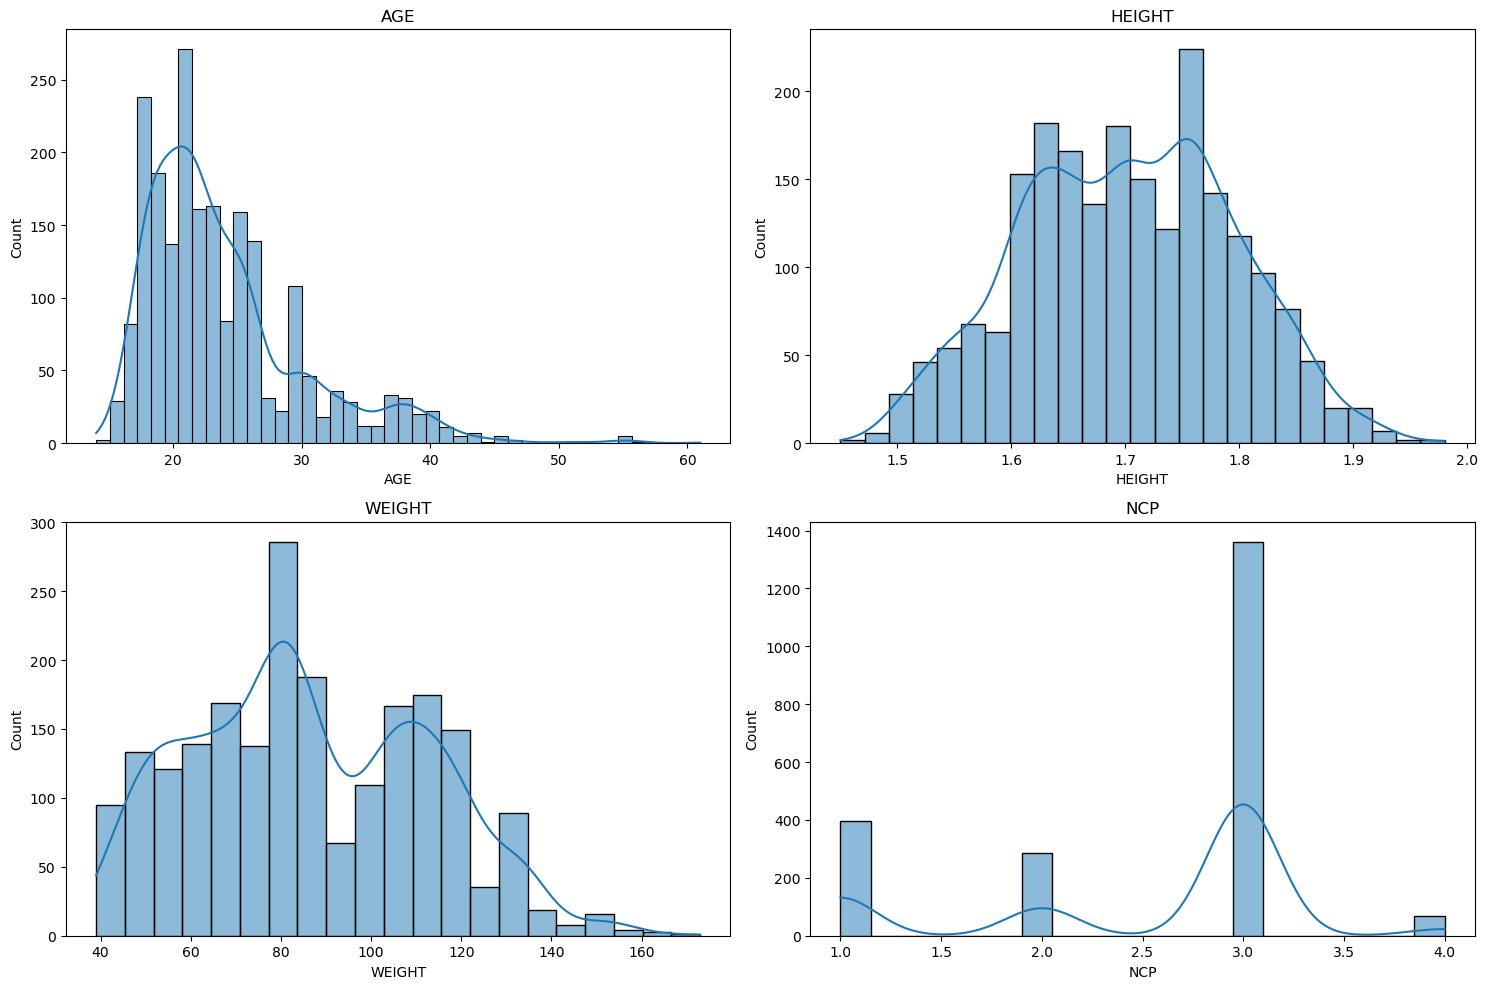

In [10]:
# Use BarPlots to View the Distribution of the Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(obesity[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

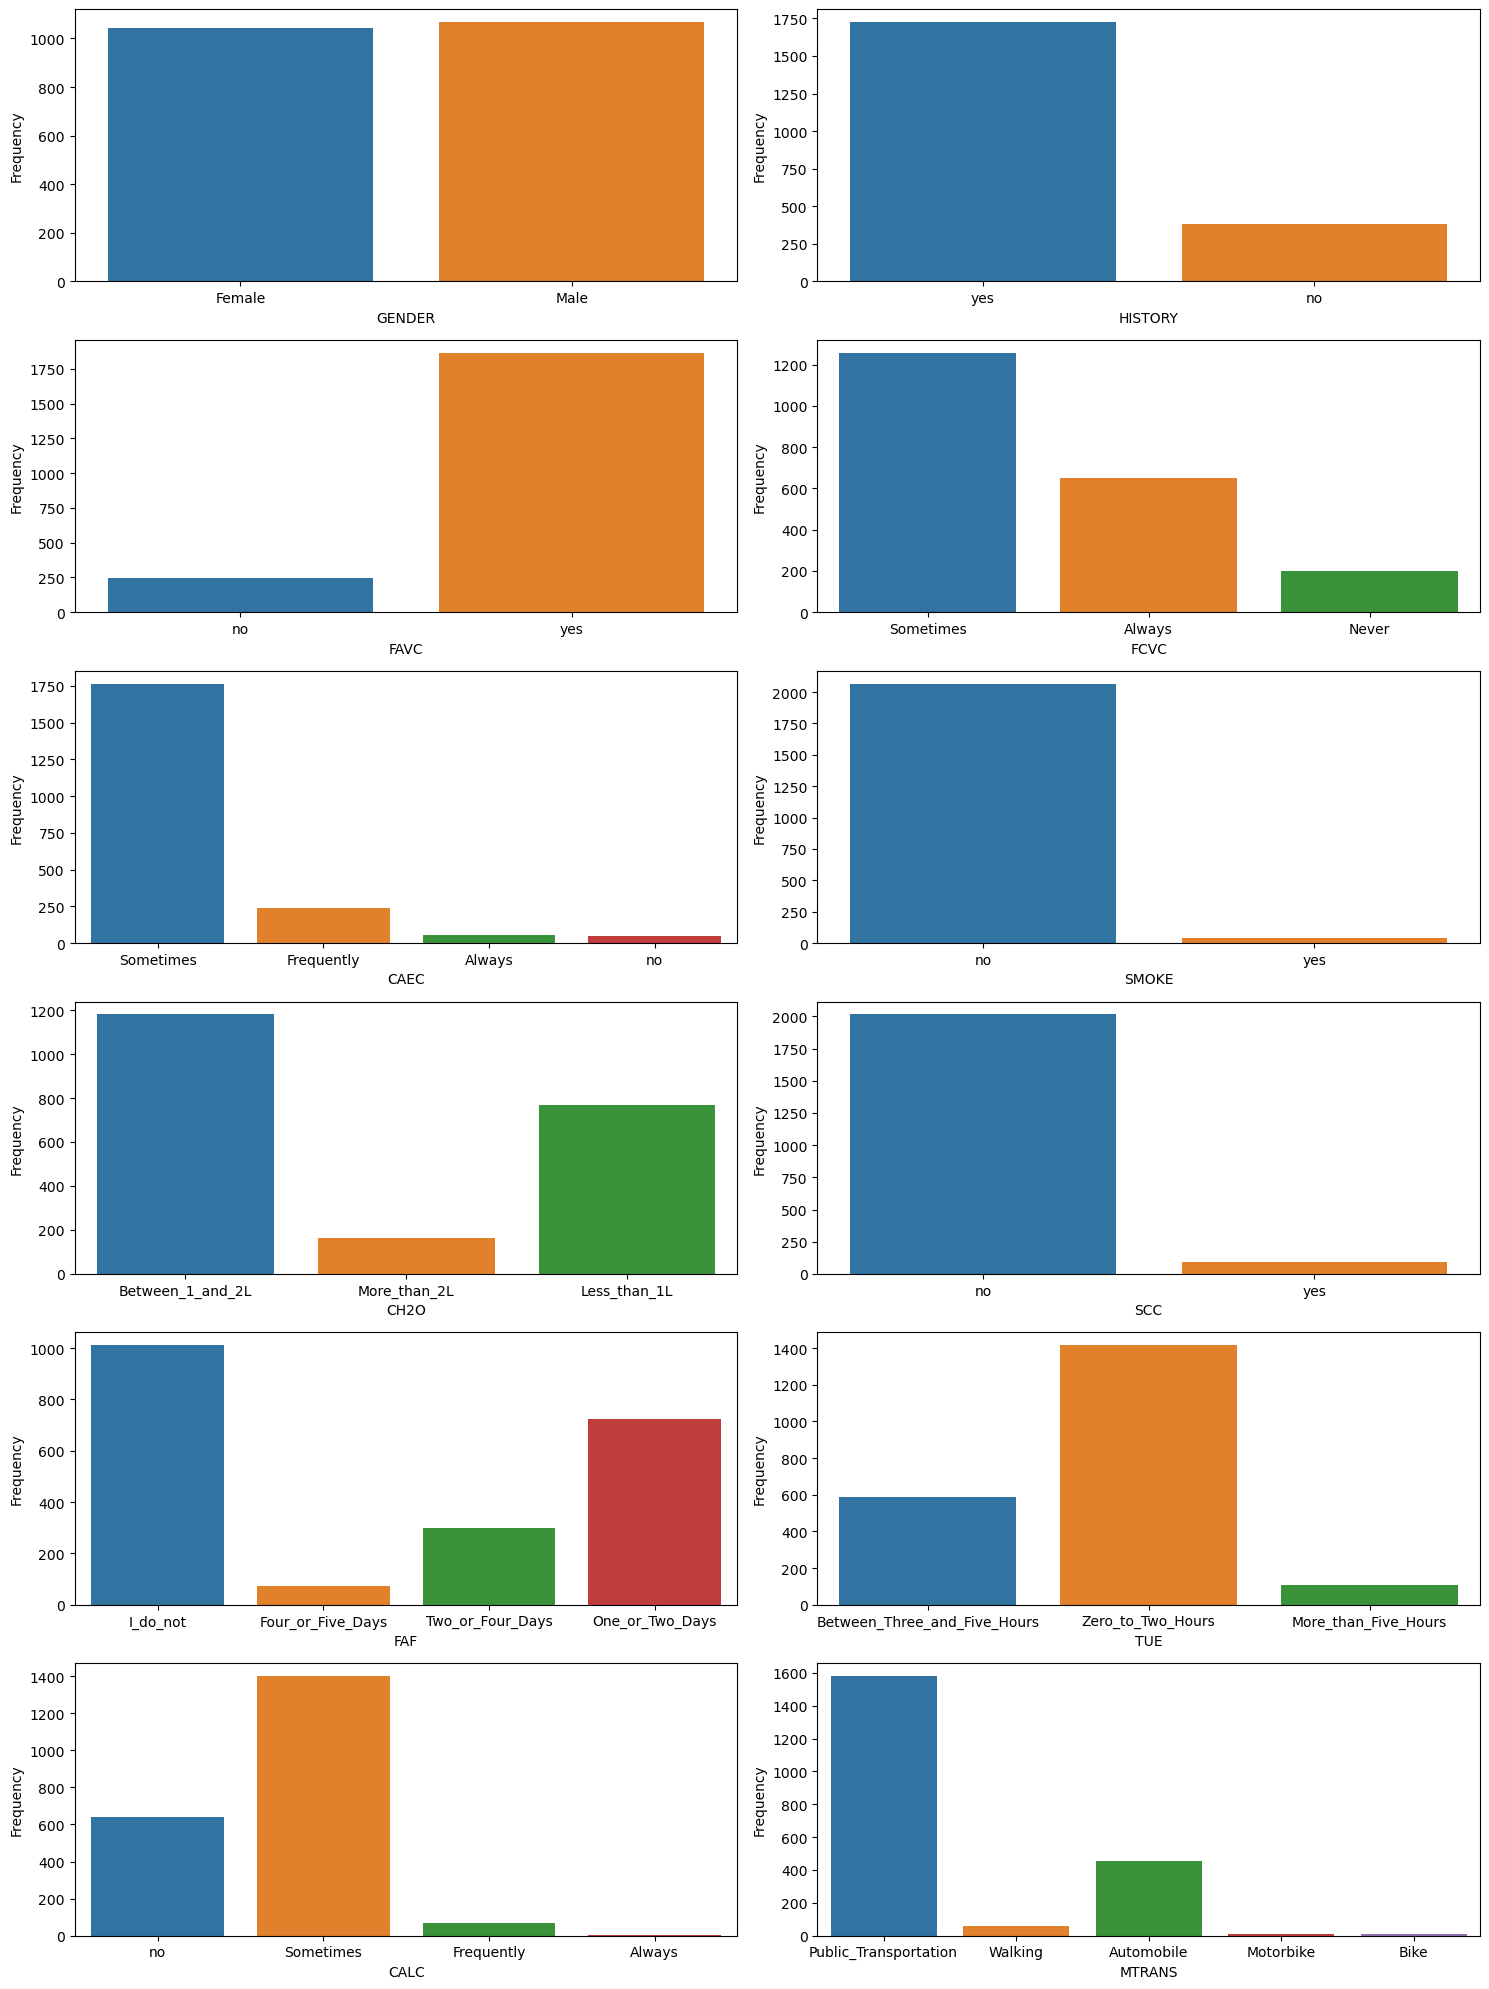

In [11]:
# Use Countplots to View the Distribution of the Categorical Variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    if col != "OBLEVEL":
        plt.subplot(6, 2, i)
        sns.countplot(data=obesity, x=col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

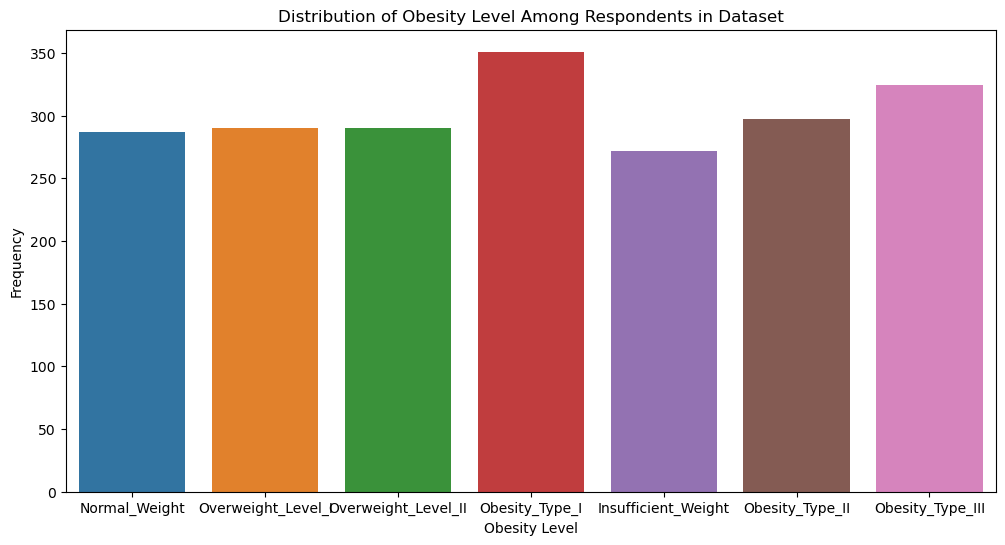

In [12]:
# Use a Countplot to View the Distribution of the Target Variable - Obesity Level
plt.figure(figsize=(12, 6))
sns.countplot(data=obesity, x='OBLEVEL')
plt.title('Distribution of Obesity Level Among Respondents in Dataset')
plt.xlabel('Obesity Level')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Instantiate Label Encoder and Encode OBLEVEL - the Target Variable
label_encoder = LabelEncoder()
obesity['OBLEVEL'] = label_encoder.fit_transform(obesity['OBLEVEL'])
obesity = pd.get_dummies(obesity)

In [14]:
obesity.head()

AGE  HEIGHT  WEIGHT  NCP  OBLEVEL  GENDER_Female  GENDER_Male  HISTORY_no  \
0   21    1.62    64.0    3        1           True        False       False   
1   21    1.52    56.0    3        1           True        False       False   
2   23    1.80    77.0    3        1          False         True       False   
3   27    1.80    87.0    3        5          False         True        True   
4   22    1.78    89.8    1        6          False         True        True   

   HISTORY_yes  FAVC_no  ...  TUE_Zero_to_Two_Hours  CALC_Always  \
0         True     True  ...                  False        False   
1         True     True  ...                   True        False   
2         True     True  ...                  False        False   
3        False     True  ...                   True        False   
4        False     True  ...                   True        False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0            False           False     True              False        False   
1            False            True    False              False        False   
2             True           False    False              False        False   
3             True           False    False              False        False   
4            False            True    False              False        False   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0             False                          True           False  
1             False                          True           False  
2             False                          True           False  
3             False                         False            True  
4             False                          True           False  

[5 rows x 41 columns]

In [15]:
# Create Target Variables and Feature Variables from Obesity Dataset
X = obesity.drop(['OBLEVEL'], axis=1)
y = obesity['OBLEVEL']

In [16]:
# Split Data into Train and Test Portions and A Third Category Called Validation (For Decision Trees and Random Forests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# Train Model and Check Accuracy
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds )
print(f"Training Accuracy: {train_accuracy}")

# Check Accuracy of Validation Data to Determine if Hyperparameter Tuning Would be Needed
val_preds = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 1.0
Validation Accuracy: 0.9289940828402367


In [18]:
# Check Model Performance with Test Data
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.9219858156028369


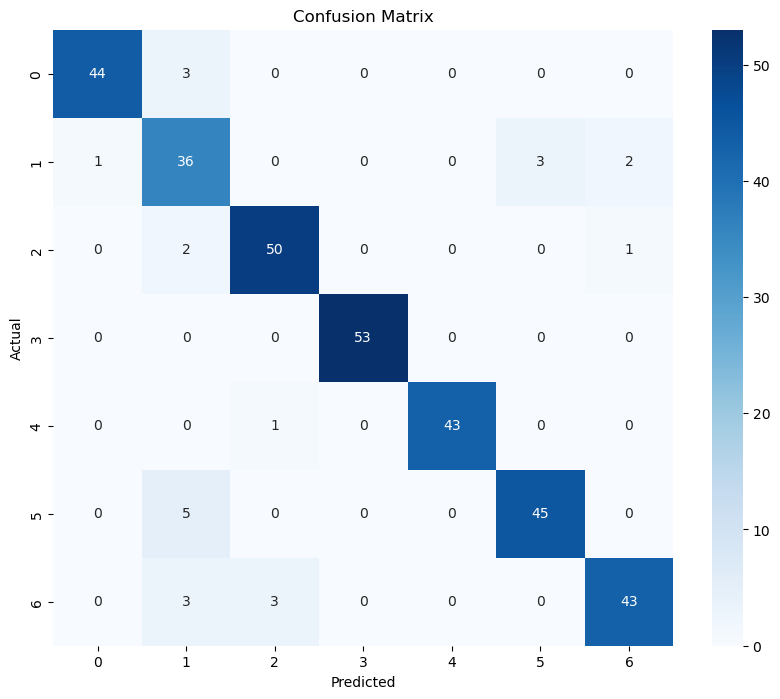

In [19]:
#Confusion matrix for Validation Data
conf_matrix = pd.crosstab(y_val, val_preds, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

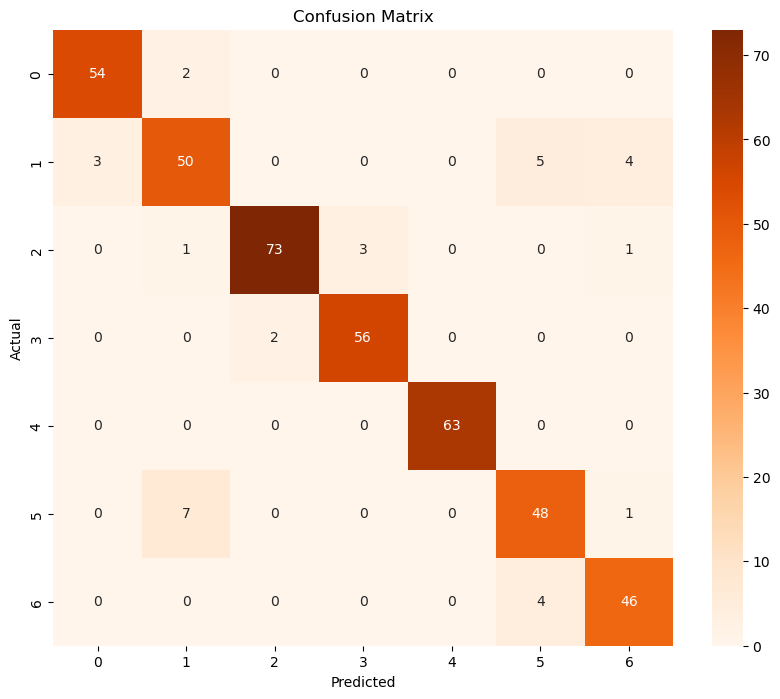

In [20]:
#Confusion matrix for Test Data
conf_matrix = pd.crosstab(y_test, test_preds, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.show()

In [21]:
results = pd.DataFrame({'Predicted': test_preds, 'Actual': y_test})
results.head()

Predicted  Actual
544           0       0
1987          4       4
420           0       0
527           0       0
196           6       1

In [22]:
# Create Target Map Dictionary to View Data as Objects and Not Integers
obmap = {0:'Insufficient_Weight',1:'Normal_Weight',2:'Overweight_Level_I',3:'Overweight_Level_II',4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'}
results = results.apply(lambda col: col.map(obmap))
results.head()

Predicted               Actual
544   Insufficient_Weight  Insufficient_Weight
1987       Obesity_Type_I       Obesity_Type_I
420   Insufficient_Weight  Insufficient_Weight
527   Insufficient_Weight  Insufficient_Weight
196      Obesity_Type_III        Normal_Weight

In [23]:
print(results['Predicted'].value_counts())
print(results['Actual'].value_counts())

Predicted
Overweight_Level_I     75
Obesity_Type_I         63
Normal_Weight          60
Overweight_Level_II    59
Insufficient_Weight    57
Obesity_Type_II        57
Obesity_Type_III       52
Name: count, dtype: int64
Actual
Overweight_Level_I     78
Obesity_Type_I         63
Normal_Weight          62
Overweight_Level_II    58
Insufficient_Weight    56
Obesity_Type_II        56
Obesity_Type_III       50
Name: count, dtype: int64


In [24]:
# Save Model as .pkl file
pickle.dump(model, open('model.pkl', 'wb'))